In [21]:
import pandas as pd
import cv2
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

In [8]:
data = pd.read_csv(r"C:\Users\goyle\Downloads\Section-1-and-3-data\Section 3 data.csv", encoding='utf-8')

In [10]:

data

,3.356726646,3.4246883392333984,3.315129280090332,2.866584539413452,3.2591633796691895,3.063363790512085,3.02205228805542,3.709723949432373,3.0598325729370117,2.890528678894043,...,3.2995495796203613,3.197462558746338,3.1719608306884766,3.526296615600586,3.013812303543091,3.373962879180908,3.448312759399414,3.622835636138916,3.211477041244507,3.4222567081451416
0,3.264011,3.331538,3.254502,2.816155,3.175651,2.995944,2.963060,3.618391,3.015709,2.849339,...,3.220985,3.110368,3.108212,3.489397,2.960912,3.306820,3.417709,3.524081,3.141618,3.361223
1,3.170393,3.238018,3.185075,2.759907,3.089149,2.929650,2.906405,3.522798,2.967472,2.804227,...,3.139422,3.024213,3.043078,3.437473,2.904058,3.234052,3.370602,3.421170,3.069848,3.288135
2,3.073419,3.143099,3.082911,2.682017,2.991492,2.867536,2.858474,3.411356,2.903908,2.744555,...,3.046735,2.941585,2.972789,3.329692,2.832499,3.140333,3.262105,3.302803,2.990968,3.170215
3,2.976448,3.048187,2.980743,2.604133,2.893835,2.805416,2.810538,3.299923,2.840350,2.684883,...,2.954042,2.858966,2.902495,3.221916,2.760934,3.046621,3.153600,3.184436,2.912082,3.052295
4,2.879478,2.953276,2.878582,2.526245,2.796179,2.743304,2.762607,3.188490,2.776787,2.625209,...,2.861355,2.776344,2.832206,3.114133,2.689374,2.952907,3.045095,3.066068,2.833202,2.934375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4648,1.718687,1.780328,1.364540,1.291920,1.060938,0.951350,1.969769,3.457134,1.841767,0.723321,...,10.515642,0.893715,1.753626,4.839245,1.010556,3.374171,2.850732,0.946474,0.974550,1.025981
4649,1.798417,2.215754,1.297023,1.411583,0.894733,0.861312,1.120137,2.679779,0.653337,0.705998,...,1.072754,0.684518,1.451200,1.127545,0.881538,1.310711,2.035393,0.930384,0.807320,1.109655
4650,1.364369,1.778911,0.846207,1.515962,0.898278,0.719239,0.842672,0.860480,0.623939,0.894922,...,0.783171,0.696427,1.129982,0.854248,0.942355,0.711466,0.673942,0.628565,0.616893,1.103891
4651,1.011800,1.249690,0.827500,1.465700,0.903440,0.679450,0.897110,0.897580,0.830160,1.429770,...,1.302580,3.233280,1.313440,1.293910,1.448750,1.555390,1.170550,0.686880,1.051330,1.627580


       3.356726646  3.4246883392333984  3.315129280090332  2.866584539413452  \
count  4653.000000         4653.000000        4653.000000        4653.000000   
mean      4.752868            4.747885           4.829078           4.897856   
std       6.090655            6.087824           6.235408           6.312660   
min       0.544619            0.560788           0.552840           0.505436   
25%       1.385173            1.342741           1.414165           1.398196   
50%       2.402526            2.351952           2.432117           2.381935   
75%       5.200344            5.236828           5.148625           5.367506   
max      70.807121           55.407410          47.104305          48.785011   

       3.2591633796691895  3.063363790512085  3.02205228805542  \
count         4653.000000        4653.000000       4653.000000   
mean             4.950687           4.636541          4.686629   
std              7.158552           5.529075          5.977091   
min            

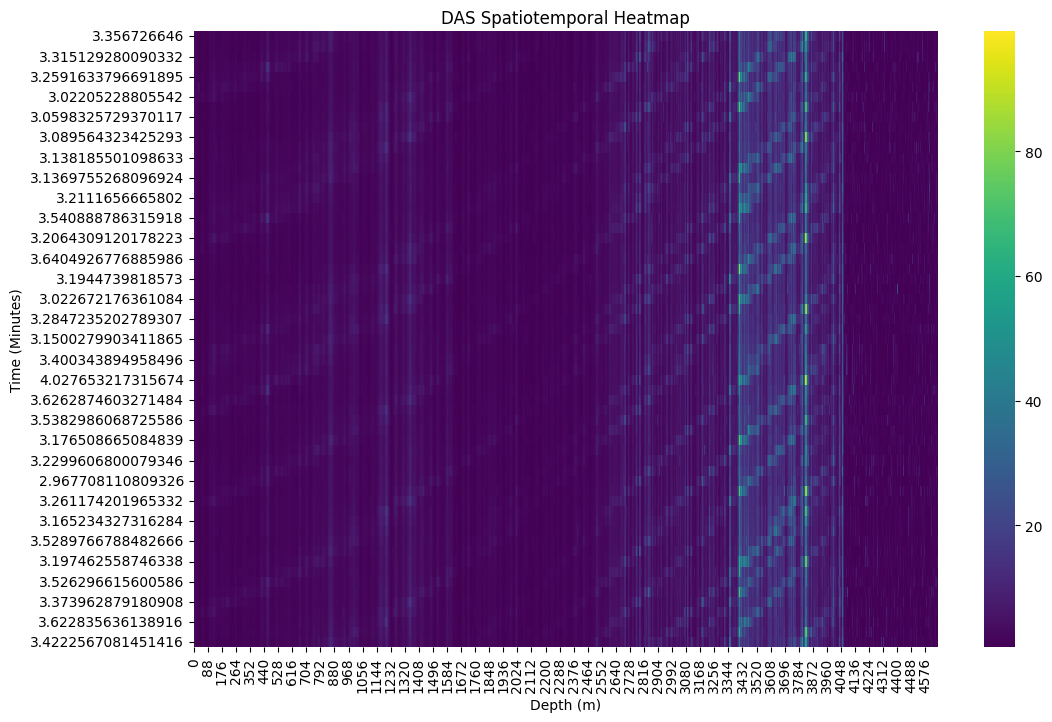

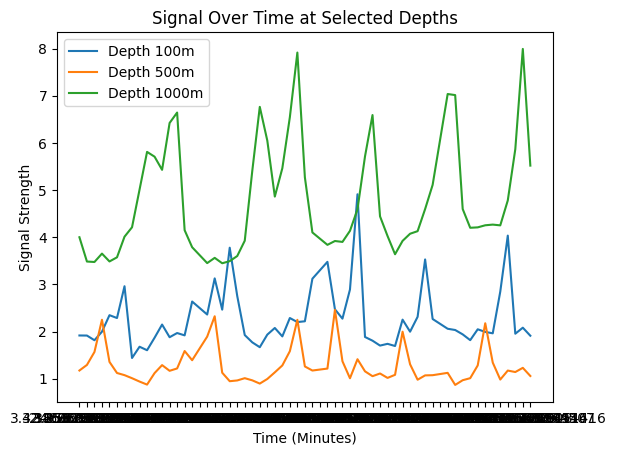

In [14]:
print(data.describe())


data_transposed = data.T
plt.figure(figsize=(12, 8))
sns.heatmap(data_transposed, cmap='viridis', cbar=True)
plt.title('DAS Spatiotemporal Heatmap')
plt.xlabel('Depth (m)')
plt.ylabel('Time (Minutes)')
plt.show()

selected_depths = [100, 500, 1000]  
for depth in selected_depths:
    plt.plot(data.iloc[depth], label=f'Depth {depth}m')
plt.xlabel('Time (Minutes)')
plt.ylabel('Signal Strength')
plt.legend()
plt.title('Signal Over Time at Selected Depths')
plt.show()

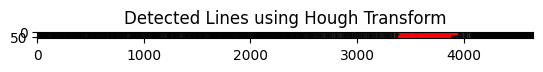

In [18]:
# Normalizing the data to the range [0, 255]
image_normalized = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

# Convert the normalized image to 8-bit format
image_uint8 = image_normalized.astype(np.uint8)

# Applying a Canny Edge Detector
edges = cv2.Canny(image_uint8, 50, 150)

# Apply the Hough Line Transform
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=100, minLineLength=50, maxLineGap=10)

# Plot detected lines on the original signal heatmap
plt.imshow(image_uint8, cmap='gray')
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        plt.plot([x1, x2], [y1, y2], 'r')
plt.title('Detected Lines using Hough Transform')
plt.show()


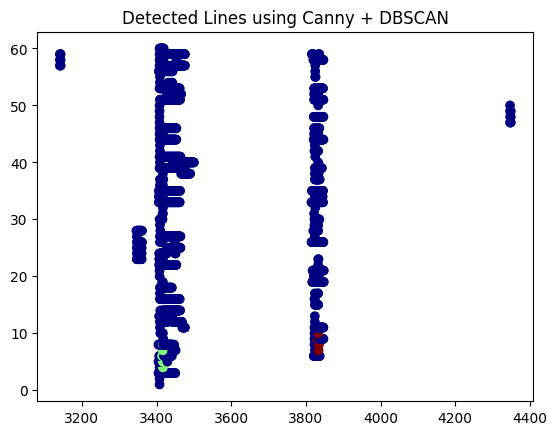

In [19]:
edges = cv2.Canny(image.astype(np.uint8), 50, 150)

# Find non-zero edge points
points = np.column_stack(np.nonzero(edges))

# Apply DBSCAN clustering to group the points into line-like structures
dbscan = DBSCAN(eps=2, min_samples=10).fit(points)

# Plot the detected clusters (representing lines)
plt.scatter(points[:, 1], points[:, 0], c=dbscan.labels_, cmap='jet')
plt.title('Detected Lines using Canny + DBSCAN')
plt.show()

In [23]:
clf = IsolationForest(contamination=0.01, random_state=42)
clf.fit(data)

# Anomalileri tahmin et (-1 ise anomali, 1 ise normal)
anomalies_ml = clf.predict(data)

# Anomalileri ayırt etmek için (-1 olanlar anomalidir)
data['Anomaly'] = anomalies_ml
anomalies_detected = data[data['Anomaly'] == -1]
anomalies_detected

,3.356726646,3.4246883392333984,3.315129280090332,2.866584539413452,3.2591633796691895,3.063363790512085,3.02205228805542,3.709723949432373,3.0598325729370117,2.890528678894043,...,3.197462558746338,3.1719608306884766,3.526296615600586,3.013812303543091,3.373962879180908,3.448312759399414,3.622835636138916,3.211477041244507,3.4222567081451416,Anomaly
3352,25.819002,20.046907,18.233595,20.615456,22.752964,44.709412,21.871754,23.145262,42.217525,16.256275,...,21.723490,35.505596,30.475521,21.234882,37.195625,23.845451,21.276054,24.940216,37.032349,-1
3353,26.888096,21.184027,19.235332,20.793139,23.317484,45.803200,23.071394,23.040453,43.358158,16.913551,...,22.023632,37.555004,31.326323,22.268991,38.642799,24.538565,23.110491,26.066145,37.845741,-1
3354,26.603525,21.209900,19.453787,20.590586,22.599367,44.628792,22.561005,22.985283,44.193993,16.765297,...,22.215067,36.295570,31.432440,22.416368,38.193905,24.707243,25.350897,26.455616,37.764751,-1
3409,30.673050,31.756178,31.331764,31.246515,57.557907,27.091187,34.483704,53.894909,26.994776,22.023939,...,48.784084,45.288082,25.723459,48.163074,37.878117,30.120510,38.295441,53.268658,27.274197,-1
3410,33.785767,34.807472,36.608978,33.944416,68.534706,31.002867,37.702461,65.967567,31.478951,27.129124,...,56.903610,56.562466,37.464676,61.021400,41.938885,32.541592,41.995617,59.277733,34.337082,-1
3411,35.823875,35.908642,38.186958,34.419804,76.460381,35.745449,38.007469,71.947517,33.855103,29.487877,...,60.813084,62.610428,39.286648,66.085617,39.239689,32.378361,41.274635,60.045395,37.796749,-1
3412,37.411671,36.878216,38.240913,36.650608,78.795609,37.659222,39.658356,74.077126,34.657299,33.067764,...,61.625721,63.674862,34.546562,69.317917,40.543228,33.707603,43.010540,62.012703,37.129112,-1
3413,38.150436,37.520863,38.088383,38.435806,80.458168,39.484791,40.269932,74.131935,34.145798,35.406437,...,62.004089,64.128075,35.076988,69.806725,40.919830,34.354778,43.700520,63.401897,37.689793,-1
3414,36.975632,37.330879,36.569492,37.618656,76.692200,37.076965,37.834507,72.903557,33.476521,33.995667,...,59.981186,61.957687,34.516060,68.513298,41.673267,34.268456,43.448967,63.619335,36.557087,-1
3415,34.426342,35.345757,35.469498,35.564800,70.568283,33.352787,35.582275,74.642479,32.892410,31.821815,...,56.856510,60.355186,32.393764,66.875107,41.606907,32.397408,42.412128,62.386066,33.428368,-1
